In [1]:
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.wordnet import NOUN, VERB, ADJ, ADV
from nltk.corpus import brown, stopwords
from nltk.cluster.util import cosine_distance
from operator import itemgetter
%matplotlib

Using matplotlib backend: Qt5Agg


In [52]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

# Loading Corpus

In [65]:
sentences = brown.sents('ca04')

In [66]:
len(sentences)

88

# Forming it as Sentences

In [67]:
sentlist=[' '.join(sent) for sent in sentences]

In [68]:
wholesent=""
for i in sentlist:
    wholesent+=i;
print(wholesent)

OsloThe most positive element to emerge from the Oslo meeting of North Atlantic Treaty Organization Foreign Ministers has been the freer , franker , and wider discussions , animated by much better mutual understanding than in past meetings .This has been a working session of an organization that , by its very nature , can only proceed along its route step by step and without dramatic changes .In Oslo , the ministers have met in a climate of candor , and made a genuine attempt to get information and understanding one another's problems .This atmosphere of understanding has been particularly noticeable where relations are concerned between the `` colonialist '' powers and those who have never , or not for a long time , had such problems .The nightmare of a clash between those in trouble in Africa , exacerbated by the difficulties , changes , and tragedies facing them , and other allies who intellectually and emotionally disapprove of the circumstances that have brought these troubles abo

In [69]:
stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)
pos_tags = {
            NOUN: ['NN', 'NNS', 'NNP', 'NNPS', 'PRP', 'PRP$', 'WP', 'WP$'],
            VERB: ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
            ADJ: ['JJ', 'JJR', 'JJS'],
            ADV: ['RB', 'RBR', 'RBS', 'WRB']
}

# Removing stop words

In [70]:
def remove_stop_words(words):
        return [w for w in words if w not in stop_words]

# Reforming sentences using regex

In [24]:
def remove_regex(sent):
        sent = " ".join([w.lower() for w in sent])
        sent = re.sub(r"i'm", "i am", sent)
        sent = re.sub(r"he's", "he is", sent)
        sent = re.sub(r"can't", "cannot", sent)
        sent = re.sub(r"don't", "do not", sent)
        sent = re.sub(r"that's", "that is", sent)
        sent = re.sub(r"\'ve", " have", sent)
        sent = re.sub(r"\'ll", " will", sent)
        sent = re.sub(r"what's", "what is", sent)
        sent = re.sub(r"where's", "where is", sent)
        sent = re.sub(r"\'re", " are", sent)
        sent = re.sub(r"\'d", " would", sent)
        sent = re.sub(r"she's", "she is", sent)
        sent = re.sub(r"won't", "will not", sent)
        patterns = re.finditer("#[\w]*", sent)
        for pattern in patterns:
            sent = re.sub(pattern.group().strip(), "", sent)
        sent = "".join(ch for ch in sent if ch not in punctuations)
        return sent

# pos tagging for all words

In [28]:
def posTagging(words):
        tagged_words = pos_tag(words)
        pos_words = []
        for word in tagged_words:
            flag = False
            for key, value in pos_tags.items():
                if word[1] in value:
                    pos_words.append((word[0], key))
                    flag = True
                    break
            if not flag:
                pos_words.append((word[0], NOUN))
        return pos_words

# Data preprocessing

In [50]:
def preprocessData(sentence):
    sentence= remove_regex(sentence)
    words = word_tokenize(sentence)
    cleanedWords = remove_stop_words(words)
    lem = WordNetLemmatizer()
    pos_words = posTagging(words)
    cleanedWords = [lem.lemmatize(w, pos=p) for w, p in pos_words]
    return cleanedWords

# Finding sentence similarity between two sentences

In [71]:
def findSentenceSimilarity(s1, s2):
    s1 = preprocessData(s1)
    s2 = preprocessData(s2)
    allWords = list(set(s1 + s2))
    vectorForS1 = [0] * len(allWords)
    vectorForS2 = [0] * len(allWords)
    for word in s1:
        vectorForS1[allWords.index(word)] += 1
    for word in s2:
        vectorForS2[allWords.index(word)] += 1
    return 1 - cosine_distance(vectorForS1, vectorForS2)

# Creating similarity matrix

In [72]:
def createSimilarityMatrix(sentences):
    matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i == j:
                continue
            else:
                matrix[i][j] = findSentenceSimilarity(sentences[i], sentences[j])
    for i in range(len(matrix)):
        matrix[i] /= matrix[i].sum()
    return matrix

In [73]:
SimilarityMatrix = createSimilarityMatrix(sentences)

# Ranking sentences using PageRank Algorithm

In [15]:
def pagerank(matrix, eps=1.0e-8, d=0.85):
    N = matrix.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    last_v = np.ones((N, 1), dtype=np.float32) * np.inf
    M_hat = (d * matrix) + (((1 - d) / N) * np.ones((N, N), dtype=np.float32))
    
    while np.linalg.norm(v - last_v, 2) > eps:
        last_v = v
        v = np.matmul(M_hat, v)
    return v

In [74]:
ranks = pagerank(SimilarityMatrix)

In [75]:
ranks

array([[0.0193724 ],
       [0.01955397],
       [0.00571285],
       [0.01001579],
       [0.00299163],
       [0.01842827],
       [0.01119953],
       [0.01127318],
       [0.01906513],
       [0.01620789],
       [0.01608808],
       [0.01224105],
       [0.00601897],
       [0.00565001],
       [0.00503623],
       [0.00273933],
       [0.01264616],
       [0.01880637],
       [0.01289116],
       [0.01422477],
       [0.00868737],
       [0.01828228],
       [0.00248362],
       [0.00886595],
       [0.01081954],
       [0.01911716],
       [0.01831441],
       [0.01157012],
       [0.01783309],
       [0.01403563],
       [0.0125579 ],
       [0.0157735 ],
       [0.0151614 ],
       [0.00756478],
       [0.00894467],
       [0.01892132],
       [0.01677961],
       [0.00246989],
       [0.01761293],
       [0.01981723],
       [0.00985536],
       [0.019875  ],
       [0.00881692],
       [0.00547417],
       [0.00936927],
       [0.01319557],
       [0.01533521],
       [0.009

In [76]:
sortRankWithindexes = [item[0] for item in sorted(enumerate(ranks), key=lambda item: -item[1])]

In [77]:
sortRankWithindexes

[54,
 41,
 39,
 1,
 0,
 74,
 25,
 8,
 35,
 17,
 5,
 26,
 21,
 70,
 56,
 76,
 28,
 38,
 85,
 36,
 66,
 86,
 9,
 10,
 87,
 31,
 83,
 46,
 32,
 75,
 19,
 62,
 29,
 82,
 45,
 79,
 18,
 16,
 30,
 11,
 72,
 50,
 73,
 77,
 27,
 7,
 6,
 24,
 52,
 3,
 40,
 67,
 55,
 47,
 44,
 34,
 59,
 23,
 42,
 20,
 69,
 71,
 53,
 33,
 49,
 48,
 58,
 57,
 12,
 80,
 2,
 13,
 78,
 43,
 14,
 51,
 84,
 60,
 4,
 15,
 61,
 22,
 37,
 65,
 64,
 68,
 63,
 81]

# Bar chart representing importance of all sentences

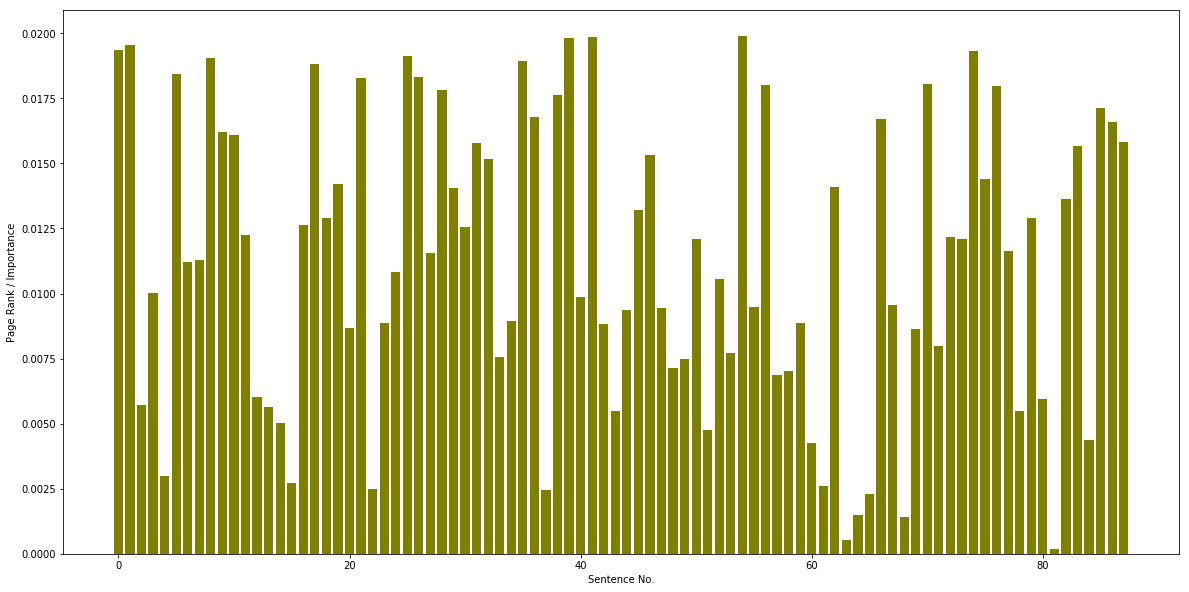

In [78]:
plt.figure(figsize=(20, 10))
plt.bar([item[0] for item in sorted(enumerate(ranks))], ranks.T[0],color='olive',width=0.8)
plt.ylabel("Page Rank / Importance")
plt.xlabel("Sentence No.")
plt.show()

In [79]:
SummaryLines = 5

# Selecting top sentences for summary

In [80]:
selectedSentences = sorted(sortRankWithindexes[:SummaryLines])

In [81]:
summary = itemgetter(*selectedSentences)(sentences)

In [82]:
finalSummary=""
for sentence in summary:
    finalSummary+=' '.join(sentence)

# Final Summary

In [83]:
finalSummary

"OsloThe most positive element to emerge from the Oslo meeting of North Atlantic Treaty Organization Foreign Ministers has been the freer , franker , and wider discussions , animated by much better mutual understanding than in past meetings .How effective have Kennedy administration first foreign policy decisions been in dealing with Communist aggression ? ?He was critical of what he feels is President Kennedy's tendency to be too conciliatory .Mr. Nixon , for his part , would oppose intervention in Cuba without specific provocation ."